### factors_analysis_economic 
Do economic factors related to the pandemic have an impact on the overdose trends? Do states with higher unemployment rates see higher numbers of overdoses? Did more economic protections (i.e. eviction stays, utility shut off freezes) relate to a decrease number of ODs?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
employ_df = pd.read_csv('../data/data_clean/employment_rate_2020.csv')
eco_df = pd.read_csv('../data/data_clean/economic_factors.csv')
od_cov= pd.read_csv('../data/data_clean/change_OD_2019_to_2020.csv')
trends_df = pd.read_csv('../data/data_clean/trends.csv')

How do employment rates impact overdose percentages?
Steps:
1. Merge Unemployment and overdose data 
2. Visualize

In [3]:
od_cov = od_cov.rename(columns = {'State':'ST'})
od_cov['ST'].nunique()
od_cov

,ST,Month,2019_rate,2020_rate,%_dif
0,AK,Jan,2.46,2.95,0.49
1,AK,Feb,2.62,2.75,0.13
2,AK,Mar,2.79,2.60,-0.19
3,AK,Apr,2.70,2.66,-0.04
4,AK,May,2.87,2.84,-0.03
...,...,...,...,...,...
245,WY,Jan,1.29,1.64,0.35
246,WY,Feb,1.28,1.67,0.39
247,WY,Mar,1.37,1.70,0.33
248,WY,Apr,1.34,1.72,0.38


In [4]:
employ_df

,Date,State,Year,Month,Employed,%_employed,Unemployed,%_unemployed,Date.1
0,2020-01-01,Alabama,2020,1,2186652,56.5,61069,2.7,2020-01-01
1,2020-01-01,Alaska,2020,1,325347,59.8,20931,6.0,2020-01-01
2,2020-01-01,Arizona,2020,1,3442732,59.6,162073,4.5,2020-01-01
3,2020-01-01,Arkansas,2020,1,1318240,56.1,48068,3.5,2020-01-01
4,2020-01-01,California,2020,1,18756375,60.2,753269,3.9,2020-01-01
...,...,...,...,...,...,...,...,...,...
245,2020-05-01,Virginia,2020,5,3916764,58.4,389546,9.0,2020-05-01
246,2020-05-01,Washington,2020,5,3351584,55.0,593883,15.1,2020-05-01
247,2020-05-01,West Virginia,2020,5,679272,47.2,100757,12.9,2020-05-01
248,2020-05-01,Wisconsin,2020,5,2726588,58.6,376650,12.1,2020-05-01


#### Start with unemployment data 

In [5]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
employ_df['ST'] = employ_df['State'].map(us_state_abbrev)
employ_df

,Date,State,Year,Month,Employed,%_employed,Unemployed,%_unemployed,Date.1,ST
0,2020-01-01,Alabama,2020,1,2186652,56.5,61069,2.7,2020-01-01,AL
1,2020-01-01,Alaska,2020,1,325347,59.8,20931,6.0,2020-01-01,AK
2,2020-01-01,Arizona,2020,1,3442732,59.6,162073,4.5,2020-01-01,AZ
3,2020-01-01,Arkansas,2020,1,1318240,56.1,48068,3.5,2020-01-01,AR
4,2020-01-01,California,2020,1,18756375,60.2,753269,3.9,2020-01-01,CA
...,...,...,...,...,...,...,...,...,...,...
245,2020-05-01,Virginia,2020,5,3916764,58.4,389546,9.0,2020-05-01,VA
246,2020-05-01,Washington,2020,5,3351584,55.0,593883,15.1,2020-05-01,WA
247,2020-05-01,West Virginia,2020,5,679272,47.2,100757,12.9,2020-05-01,WV
248,2020-05-01,Wisconsin,2020,5,2726588,58.6,376650,12.1,2020-05-01,WI


In [6]:
cols_clean = ['Date','ST','Employed','%_employed','Unemployed','%_unemployed']
employ_clean = employ_df[cols_clean]
employ_clean.reset_index()

,index,Date,ST,Employed,%_employed,Unemployed,%_unemployed
0,0,2020-01-01,AL,2186652,56.5,61069,2.7
1,1,2020-01-01,AK,325347,59.8,20931,6.0
2,2,2020-01-01,AZ,3442732,59.6,162073,4.5
3,3,2020-01-01,AR,1318240,56.1,48068,3.5
4,4,2020-01-01,CA,18756375,60.2,753269,3.9
...,...,...,...,...,...,...,...
245,245,2020-05-01,VA,3916764,58.4,389546,9.0
246,246,2020-05-01,WA,3351584,55.0,593883,15.1
247,247,2020-05-01,WV,679272,47.2,100757,12.9
248,248,2020-05-01,WI,2726588,58.6,376650,12.1


In [7]:
employ_clean = employ_clean.copy()
employ_clean['Date']= pd.to_datetime(employ_clean['Date'])
employ_clean

,Date,ST,Employed,%_employed,Unemployed,%_unemployed
0,2020-01-01,AL,2186652,56.5,61069,2.7
1,2020-01-01,AK,325347,59.8,20931,6.0
2,2020-01-01,AZ,3442732,59.6,162073,4.5
3,2020-01-01,AR,1318240,56.1,48068,3.5
4,2020-01-01,CA,18756375,60.2,753269,3.9
...,...,...,...,...,...,...
245,2020-05-01,VA,3916764,58.4,389546,9.0
246,2020-05-01,WA,3351584,55.0,593883,15.1
247,2020-05-01,WV,679272,47.2,100757,12.9
248,2020-05-01,WI,2726588,58.6,376650,12.1


In [8]:
employ_clean['Date'] = pd.to_datetime(employ_clean['Date'])
employ_clean['Month'] = employ_clean['Date'].dt.strftime('%b')
employ_clean

,Date,ST,Employed,%_employed,Unemployed,%_unemployed,Month
0,2020-01-01,AL,2186652,56.5,61069,2.7,Jan
1,2020-01-01,AK,325347,59.8,20931,6.0,Jan
2,2020-01-01,AZ,3442732,59.6,162073,4.5,Jan
3,2020-01-01,AR,1318240,56.1,48068,3.5,Jan
4,2020-01-01,CA,18756375,60.2,753269,3.9,Jan
...,...,...,...,...,...,...,...
245,2020-05-01,VA,3916764,58.4,389546,9.0,May
246,2020-05-01,WA,3351584,55.0,593883,15.1,May
247,2020-05-01,WV,679272,47.2,100757,12.9,May
248,2020-05-01,WI,2726588,58.6,376650,12.1,May


In [9]:
employ_df['State'].nunique(), employ_df['ST'].nunique()

(50, 50)

In [10]:
cov_employ = employ_clean.merge(od_cov, on=['ST','Month'])
cov_employ

,Date,ST,Employed,%_employed,Unemployed,%_unemployed,Month,2019_rate,2020_rate,%_dif
0,2020-01-01,AL,2186652,56.5,61069,2.7,Jan,1.38,1.42,0.04
1,2020-01-01,AK,325347,59.8,20931,6.0,Jan,2.46,2.95,0.49
2,2020-01-01,AZ,3442732,59.6,162073,4.5,Jan,2.90,3.31,0.41
3,2020-01-01,AR,1318240,56.1,48068,3.5,Jan,1.40,1.14,-0.26
4,2020-01-01,CA,18756375,60.2,753269,3.9,Jan,2.07,2.39,0.32
...,...,...,...,...,...,...,...,...,...,...
245,2020-05-01,VA,3916764,58.4,389546,9.0,May,2.18,2.34,0.16
246,2020-05-01,WA,3351584,55.0,593883,15.1,May,2.05,2.43,0.38
247,2020-05-01,WV,679272,47.2,100757,12.9,May,3.70,4.45,0.75
248,2020-05-01,WI,2726588,58.6,376650,12.1,May,2.10,2.43,0.33


In [11]:
eco_cor_cols = ['ST','Month','%_unemployed','2020_rate']
eco_cor = cov_employ[eco_cor_cols]
eco_cor

,ST,Month,%_unemployed,2020_rate
0,AL,Jan,2.7,1.42
1,AK,Jan,6.0,2.95
2,AZ,Jan,4.5,3.31
3,AR,Jan,3.5,1.14
4,CA,Jan,3.9,2.39
...,...,...,...,...
245,VA,May,9.0,2.34
246,WA,May,15.1,2.43
247,WV,May,12.9,4.45
248,WI,May,12.1,2.43


## Is there correlation between unemployment and overdose?

<AxesSubplot:xlabel='Month', ylabel='Percent of deaths caused by overdose'>

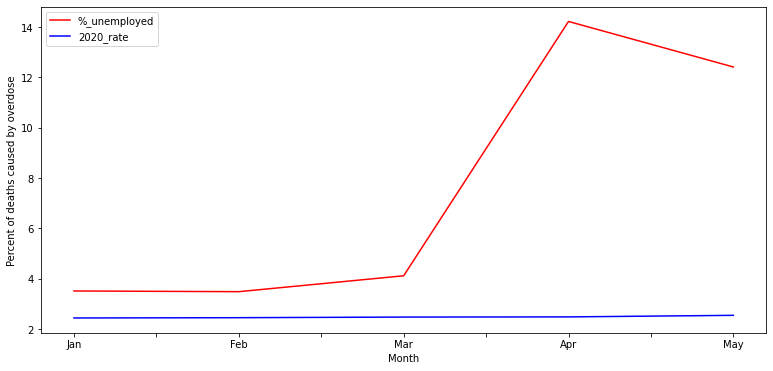

In [12]:
order = ['Jan', 'Feb', 'Mar','Apr','May']
eco_cor.groupby('Month')['%_unemployed'].mean().loc[order].plot(kind='line',color='red',figsize=(13,6),ylabel='Percent of deaths caused by overdose',legend=True)
eco_cor.groupby('Month')['2020_rate'].mean().loc[order].plot(kind='line',color='blue',figsize=(13,6),ylabel='Percent of deaths caused by overdose',legend=True)


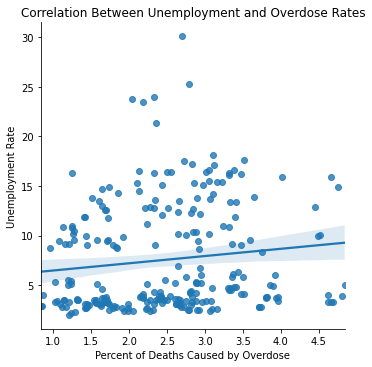

In [13]:
ax = sns.lmplot(x='2020_rate',y='%_unemployed',data=eco_cor)
ax.set(xlabel='Percent of Deaths Caused by Overdose',ylabel='Unemployment Rate',title='Correlation Between Unemployment and Overdose Rates')

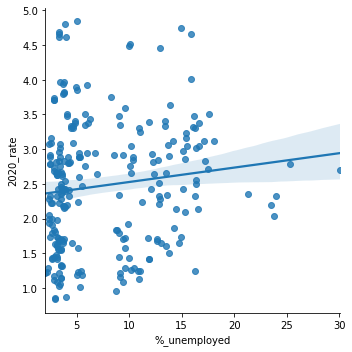

In [14]:
ax = sns.lmplot(x='%_unemployed',y='2020_rate',data=eco_cor)

### Did economic protections play a role?

In [16]:
eco_df = pd.read_csv('../data/data_clean/economic_factors.csv')
eco_df

,STATE,POSTCODE,EVICINTN,EVICINRESUME,RNTGP,UTILGAS_SO2,UTILGAS_END,UTILELEC_SO,UTILELEC_END,UTILWAT_SO,UTILWAT_END,UTILTEL_SO,UTILTEL_END,MORGFR,MINWAGE2020,evic_dur,elec_dur,wat_dur,tel_dur
0,Alabama,AL,0,2020-06-01 00:00:00,0,0,0,0,0,0,0,0,0,0,.,0.0,0.0,0.0,0.0
1,Alaska,AK,2020-03-23 00:00:00,2020-04-24 00:00:00,0,2020-04-09 00:00:00,0,2020-04-09 00:00:00,0,2020-04-09 00:00:00,0,2020-04-09 00:00:00,0,0,$10.19,32.0,0.0,0.0,0.0
2,Arizona,AZ,0,0,0,0,0,0,0,0,0,0,0,0,$12.00,0.0,0.0,0.0,0.0
3,Arkansas,AR,0,0,0,2020-04-10 00:00:00,0,2020-04-10 00:00:00,0,2020-04-10 00:00:00,0,0,0,0,$10.00,0.0,0.0,0.0,0.0
4,California,CA,0,2020-05-31 00:00:00,0,2020-03-17 00:00:00,0,2020-03-17 00:00:00,0,2020-03-17 00:00:00,0,2020-03-17 00:00:00,0,0,$13.00,0.0,0.0,0.0,0.0
5,Colorado,CO,2020-04-30 00:00:00,2020-06-13 00:00:00,0,2020-03-20 00:00:00,2020-06-13 00:00:00,2020-03-20 00:00:00,2020-06-13 00:00:00,2020-03-20 00:00:00,2020-06-13 00:00:00,0,0,0,$12.00,44.0,85.0,85.0,0.0
6,Connecticut,CT,2020-04-10 00:00:00,0,1,2020-03-12 00:00:00,0,2020-03-12 00:00:00,0,2020-03-12 00:00:00,0,0,0,0,$12.00,0.0,0.0,0.0,0.0
7,Delaware,DE,2020-03-17 00:00:00,2020-07-01 00:00:00,0,2020-03-24 00:00:00,2020-07-01 00:00:00,2020-03-24 00:00:00,2020-07-01 00:00:00,2020-03-24 00:00:00,2020-07-01 00:00:00,2020-03-24 00:00:00,2020-07-01 00:00:00,0,$9.75,106.0,99.0,99.0,99.0
8,Florida,FL,2020-04-02 00:00:00,0,0,0,0,0,0,0,0,0,0,0,$8.56,0.0,0.0,0.0,0.0
9,Georgia,GA,0,0,0,0,0,0,0,0,0,0,0,0,$5.15,0.0,0.0,0.0,0.0


Step 1: Score this df, similarly to the isolation df

In [17]:
eco_cols = ['STATE','POSTCODE','RNTGP','MORGFR','evic_dur','elec_dur','wat_dur','tel_dur']
eco_sub = eco_df[eco_cols]
eco_sub['score'] = eco_df[eco_cols].sum(axis=1)
eco_sub

,STATE,POSTCODE,RNTGP,MORGFR,evic_dur,elec_dur,wat_dur,tel_dur,score
0,Alabama,AL,0,0,0.0,0.0,0.0,0.0,0.0
1,Alaska,AK,0,0,32.0,0.0,0.0,0.0,32.0
2,Arizona,AZ,0,0,0.0,0.0,0.0,0.0,0.0
3,Arkansas,AR,0,0,0.0,0.0,0.0,0.0,0.0
4,California,CA,0,0,0.0,0.0,0.0,0.0,0.0
5,Colorado,CO,0,0,44.0,85.0,85.0,0.0,214.0
6,Connecticut,CT,1,0,0.0,0.0,0.0,0.0,1.0
7,Delaware,DE,0,0,106.0,99.0,99.0,99.0,403.0
8,Florida,FL,0,0,0.0,0.0,0.0,0.0,0.0
9,Georgia,GA,0,0,0.0,0.0,0.0,0.0,0.0


In [18]:
eco_sub_cols = ['POSTCODE','score']
to_comp = eco_sub[eco_sub_cols]
to_comp.reset_index()

,index,POSTCODE,score
0,0,AL,0.0
1,1,AK,32.0
2,2,AZ,0.0
3,3,AR,0.0
4,4,CA,0.0
5,5,CO,214.0
6,6,CT,1.0
7,7,DE,403.0
8,8,FL,0.0
9,9,GA,0.0


In [19]:
trends_df = trends_df.rename(columns = {'State':'POSTCODE'})
trends_df

,POSTCODE,state_ave
0,AK,2.760
1,AL,1.482
2,AR,1.200
3,AZ,3.382
4,CA,2.466
5,CO,2.888
6,CT,3.840
7,DE,4.734
8,FL,2.836
9,GA,1.652


In [20]:
eco_cor2 = trends_df.merge(to_comp,on=['POSTCODE'],how='outer')
eco_cor2

,POSTCODE,state_ave,score
0,AK,2.760,32.0
1,AL,1.482,0.0
2,AR,1.200,0.0
3,AZ,3.382,0.0
4,CA,2.466,0.0
5,CO,2.888,214.0
6,CT,3.840,1.0
7,DE,4.734,403.0
8,FL,2.836,0.0
9,GA,1.652,0.0


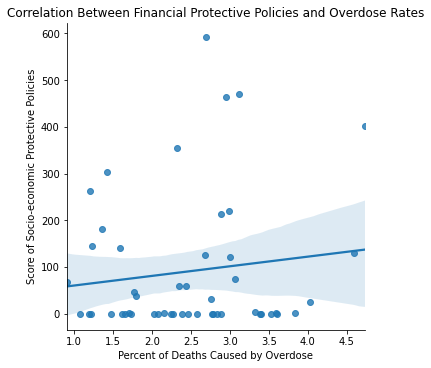

In [21]:
ax = sns.lmplot(x='state_ave',y='score',data=eco_cor2)
ax.set(xlabel='Percent of Deaths Caused by Overdose',ylabel='Score of Socio-economic Protective Policies',title='Correlation Between Financial Protective Policies and Overdose Rates')

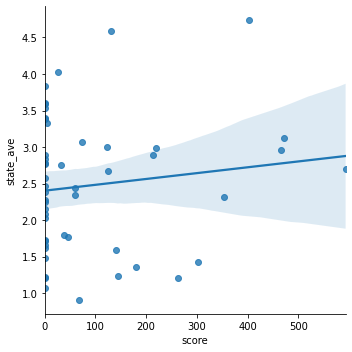

In [22]:
ax = sns.lmplot(x='score',y='state_ave',data=eco_cor2)